In [5]:
import gensim
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
#import tensorflow as tf
#import tensorflow.keras as keras
#from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.metrics import RootMeanSquaredError
#from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.layers import Conv1D, MaxPooling1D
#from tensorflow.keras.layers import LSTM

#import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers import Conv1D, MaxPooling1D

#from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import VotingRegressor,GradientBoostingRegressor,StackingRegressor

from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import r2_score

import yfinance as yf
from yahoofinancials import YahooFinancials

from datetime import timedelta

In [85]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from math import pi

In [10]:
with open ("C:/Users/King/PycharmProjects/dissertation/df_w_market_returns.pickle","rb") as f:
    df = pickle.load(f)
top_list = ['top_0', 'top_1', 'top_10', 'top_11', 'top_12', 'top_13', 'top_14',
       'top_15', 'top_16', 'top_17', 'top_18', 'top_19', 'top_2', 'top_20',
       'top_21', 'top_22', 'top_23', 'top_24', 'top_25', 'top_26', 'top_27',
       'top_28', 'top_29', 'top_3', 'top_4', 'top_5', 'top_6', 'top_7',
       'top_8', 'top_9']

In [46]:
feature_list = []
for i in range(10):
    feature_list.append(df[i][top_list].to_numpy())
features = np.vstack(feature_list)

In [53]:
''' KNN Groups'''
#reused from https://realpython.com/k-means-clustering-python/

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 27,
}

sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)


kl = KneeLocator(
    range(1, 30), sse, curve="convex", direction="decreasing")

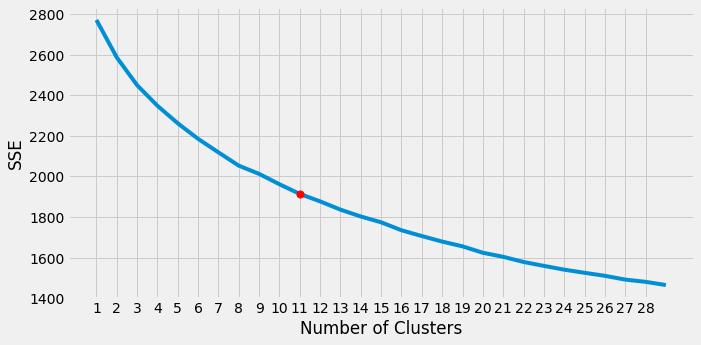

In [66]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use("fivethirtyeight")
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 29))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(kl.elbow, sse[kl.elbow-1], marker="o", markersize=7, markeredgecolor="red", markerfacecolor="red")
plt.show()

In [68]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

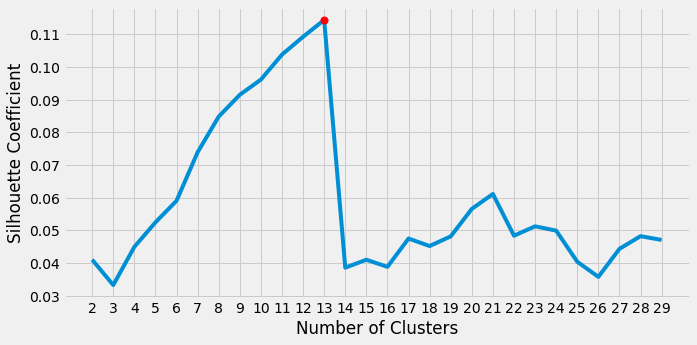

In [74]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.plot(silhouette_coefficients.index(max(silhouette_coefficients))+2, 
         max(silhouette_coefficients), marker="o", markersize=7, markeredgecolor="red", markerfacecolor="red")
plt.show()

In [76]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=13)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(features)
dbscan.fit(features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(
    features, dbscan.labels_).round (2)

In [77]:
print("kmeans_silhouette",kmeans_silhouette)
print("dbscan_silhouette", dbscan_silhouette)

kmeans_silhouette 0.11
dbscan_silhouette 0.17


In [78]:
kmeans = KMeans(n_clusters=13, **kmeans_kwargs)
kmeans.fit(features)

KMeans(init='random', n_clusters=13, random_state=27)

In [81]:
for i in range(10):
    df[i]["kmeans_group"]=kmeans.predict(feature_list[i])

In [83]:
df[0].columns

Index(['index', 'Unnamed: 0', 'date', 'title', 'content', 'link', 'symbols',
       'tags', 'sentiment', 'clean',
       ...
       'top_9_average_adjusted', 'top_9_average', 'date_time', 'date_str',
       'date_day', 'daily_return', 'next_day_return', 'two_day_return',
       'five_day_return', 'kmeans_group'],
      dtype='object', length=233)

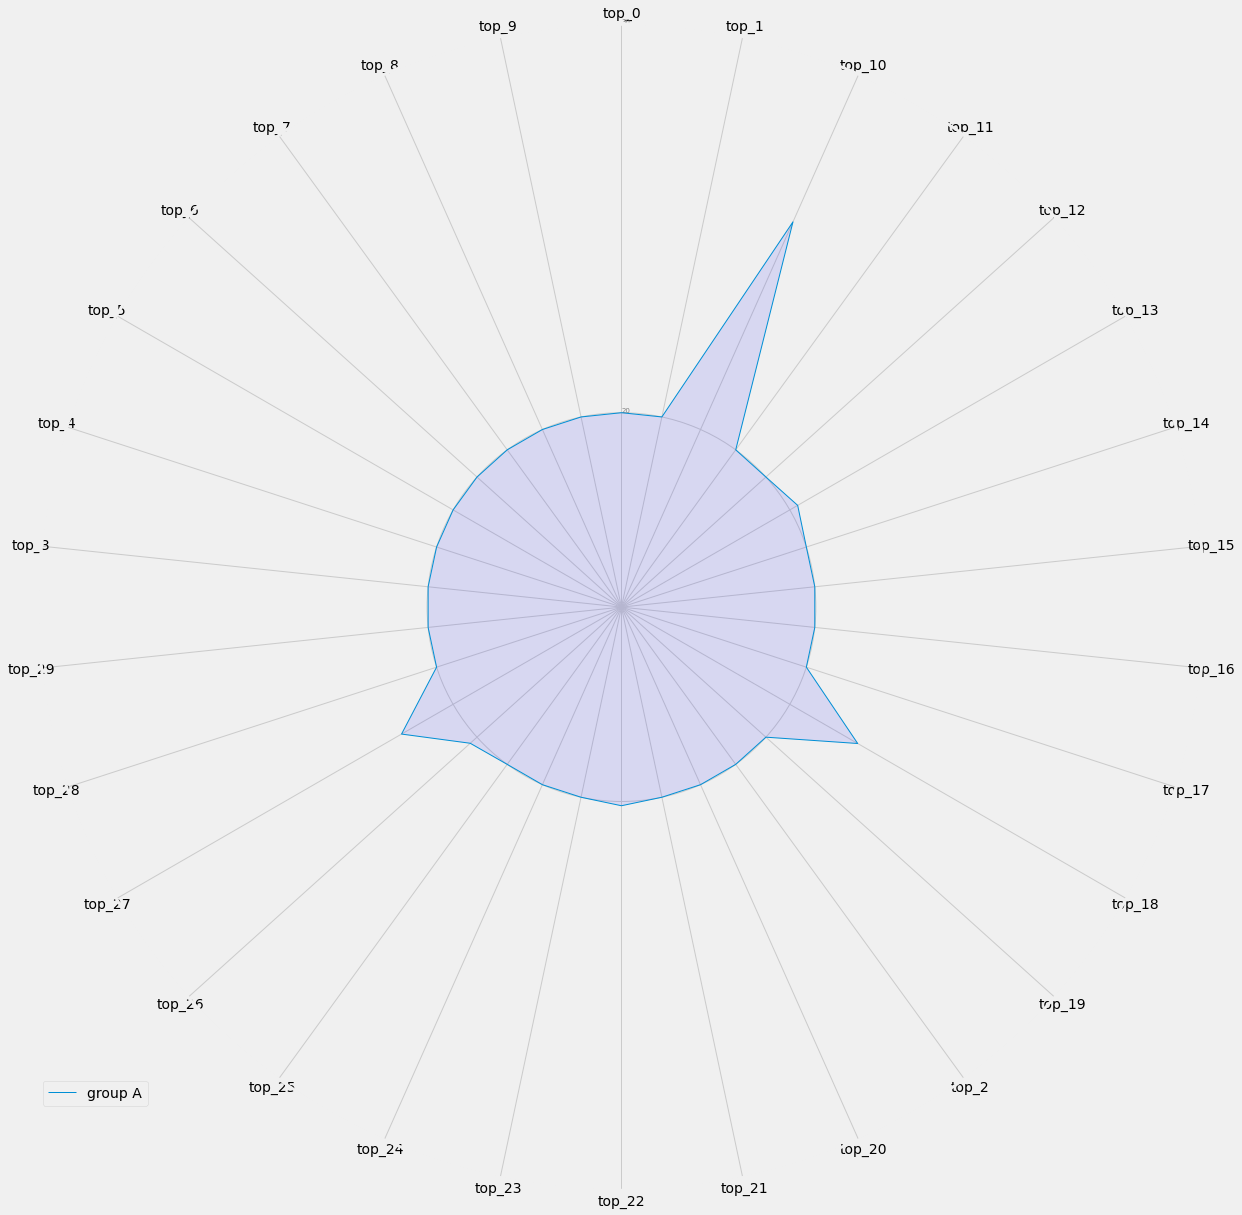

In [96]:
# number of variable
categories=top_list
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.rcParams['figure.figsize'] = [20, 20]

plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,0,1], ["10","20","30"], color="grey", size=7)
plt.ylim(-0.5,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df[0].loc[0][top_list].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
#values=df.loc[1].drop('group').values.flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
#ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [108]:
df[0][df[0]["kmeans_group"]==1][top_list].mean()

top_0     0.018041
top_1     0.040030
top_10    0.041656
top_11    0.027004
top_12    0.037700
top_13    0.353614
top_14    0.023622
top_15    0.024996
top_16    0.007400
top_17    0.011910
top_18    0.040257
top_19    0.005367
top_2     0.007467
top_20    0.016284
top_21    0.024072
top_22    0.017937
top_23    0.014194
top_24    0.009567
top_25    0.027609
top_26    0.013971
top_27    0.049362
top_28    0.053539
top_29    0.007155
top_3     0.007238
top_4     0.014211
top_5     0.026867
top_6     0.004215
top_7     0.020476
top_8     0.008046
top_9     0.019528
dtype: float64

In [119]:
import plotly.graph_objects as go

categories = top_list

fig = go.Figure()
'''
for i in range(0,13):
    fig.add_trace(go.Scatterpolar(
          r=df[0][df[0]["kmeans_group"]==i][top_list].mean(),
          theta=categories,
          fill='toself',
          name=f'Group {i}'
    ))'''
fig.add_trace(go.Scatterpolar(
      r=df[0].iloc[657][top_list],
      theta=categories,
      fill='toself',
      name='Group 2'))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1, 1]
    )),
  showlegend=False
)

fig.show()

In [133]:
from math import cos, sin
import random

In [155]:
dfp[top_list].iloc[0].max()

0.5845620632171631

In [149]:
dfp[top_list].idxmax(axis=1).iloc[0]

'top_10'

In [148]:
dfp['x_coord'] = dfp[top_list].idxmax(axis=1)

In [161]:
for j in range(10):
    x_cord_list = []
    y_cord_list = []
    for i in range(len(df[j])):
        x_cord_list.append((x_l[df[j][top_list].idxmax(axis=1).iloc[i]]+random.uniform(-0.05,0.05))*df[j][top_list].iloc[i].max())
        y_cord_list.append((y_l[df[j][top_list].idxmax(axis=1).iloc[i]]+random.uniform(-0.05,0.05))*df[j][top_list].iloc[i].max())
    df[j]["x_cord"] = x_cord_list
    df[j]["y_cord"] = y_cord_list

In [165]:
ticker_list = ["AAPL","AMZN","AVGO","FB","GOOG","MA","MSFT","NVDA","TSLA","V"]
for i in range(10):
    df[i]["stock"] = ticker_list[i]

In [181]:
df_true = pd.concat(df)

In [192]:
df_true = df_true.reset_index()

In [199]:
df_true.to_csv("df_joined.csv")

In [168]:
with open('df_w_coordinates_list.pickle', 'wb') as f:
    pickle.dump(df, f)

In [285]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [284]:
!nvidia-smi

Tue May 10 15:55:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.65       Driver Version: 511.65       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:07:00.0  On |                  N/A |
|  0%   56C    P8    12W / 120W |   1061MiB /  6144MiB |     33%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

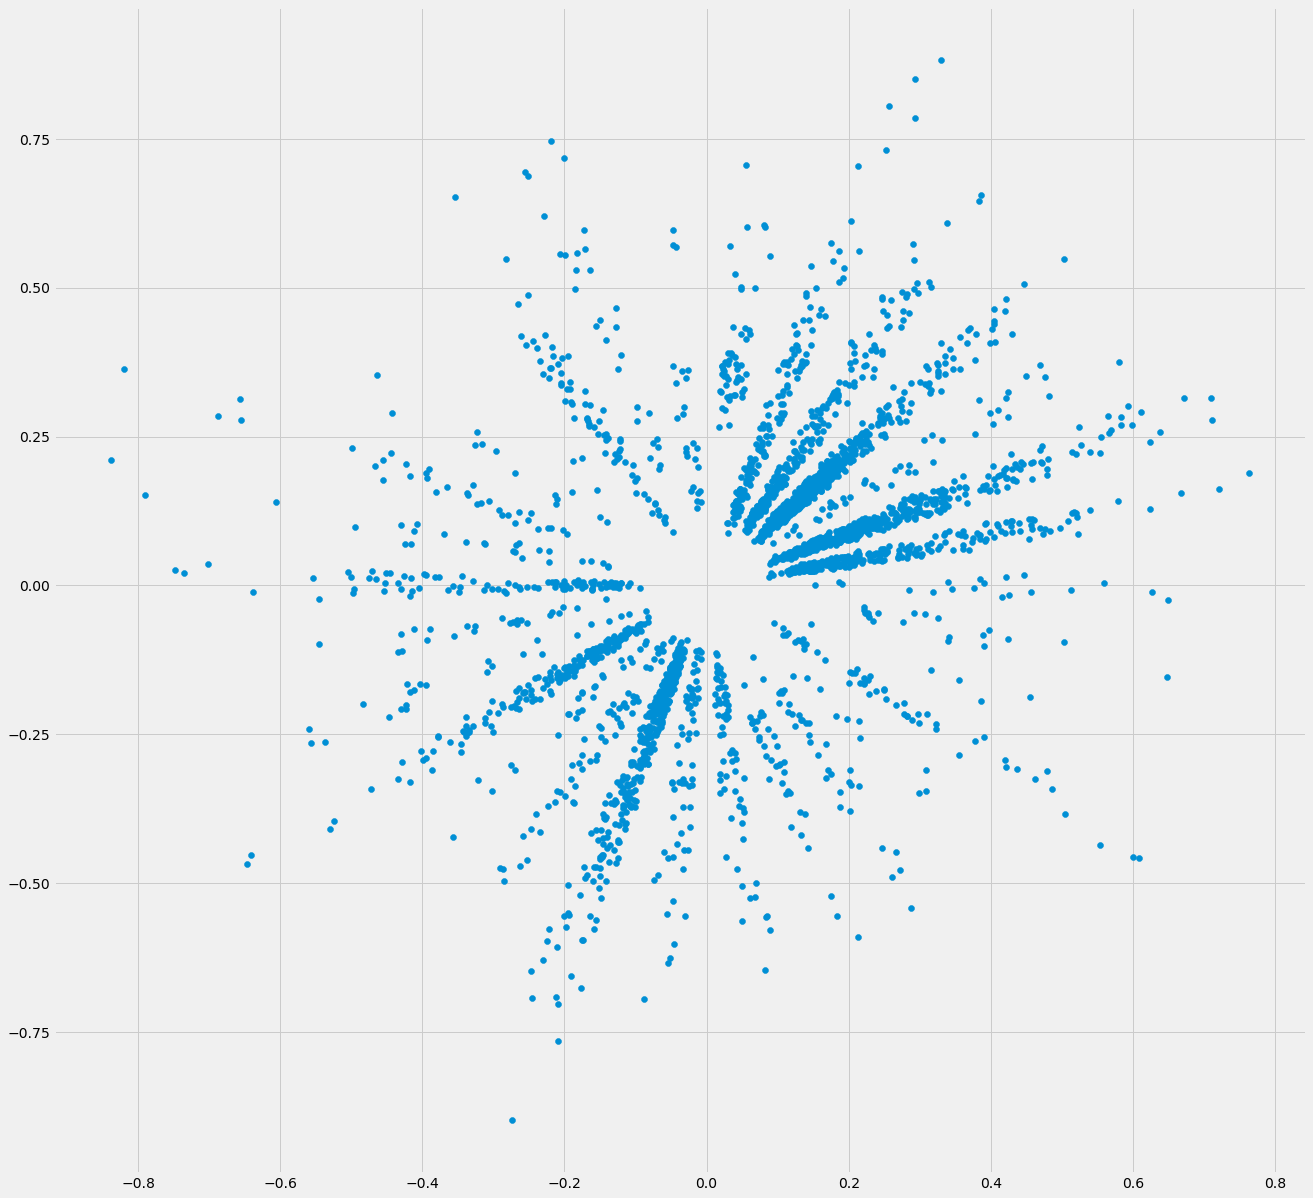

In [160]:
plt.scatter(x_cord_list,y_cord_list)
plt.show()

In [4]:
import pickle
import gensim
import pyLDAvis.gensim_models
from ast import literal_eval


In [5]:
df_true = pd.read_csv("C:/Users/King/PycharmProjects/dissertation/modeling/df_categorical_returns_3_scale.csv")

D:\Program Files (x86)\Python\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (227,228,234) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df_true['lemma'] = df_true['lemma'].apply(literal_eval)

In [7]:
dictionary = gensim.corpora.Dictionary(df_true['lemma'])
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in df_true['lemma']]
id2word = dictionary.id2token

In [8]:
model_path = "C:/Users/King/PycharmProjects/dissertation/lda_model.model"
lda_model = gensim.models.ldamodel.LdaModel.load(model_path)

In [2]:
import pandas as pd

In [3]:
pd.__version__

'1.3.5'

In [9]:
vis = pyLDAvis.gensim_models.prepare(lda_model,corpus, dictionary, mds='mmds')
pyLDAvis.save_html(vis, 'lda.html')
pyLDAvis.display(vis)

D:\Program Files (x86)\Python\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [197]:
df_true = df_true.drop(["five_day_return"],axis=1)

In [268]:
pd.set_option('display.max_columns', 500)
df_true.head()

,level_0,index,Unnamed: 0,date,title,content,link,symbols,tags,sentiment,clean,lemma,topics,top_0,top_1,top_10,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_2,top_20,top_21,top_22,top_23,top_24,top_25,top_26,top_27,top_28,top_29,top_3,top_4,top_5,top_6,top_7,top_8,top_9,positive,negative,neutral,top_0_ap1,top_0_pos,top_0_neg,top_0_neu,top_0_average_adjusted,top_0_average,top_1_ap1,top_1_pos,top_1_neg,top_1_neu,top_1_average_adjusted,top_1_average,top_10_ap1,top_10_pos,top_10_neg,top_10_neu,top_10_average_adjusted,top_10_average,top_11_ap1,top_11_pos,top_11_neg,top_11_neu,top_11_average_adjusted,top_11_average,top_12_ap1,top_12_pos,top_12_neg,top_12_neu,top_12_average_adjusted,top_12_average,top_13_ap1,top_13_pos,top_13_neg,top_13_neu,top_13_average_adjusted,top_13_average,top_14_ap1,top_14_pos,top_14_neg,top_14_neu,top_14_average_adjusted,top_14_average,top_15_ap1,top_15_pos,top_15_neg,top_15_neu,top_15_average_adjusted,top_15_average,top_16_ap1,top_16_pos,top_16_neg,top_16_neu,top_16_average_adjusted,top_16_average,top_17_ap1,top_17_pos,top_17_neg,top_17_neu,top_17_average_adjusted,top_17_average,top_18_ap1,top_18_pos,top_18_neg,top_18_neu,top_18_average_adjusted,top_18_average,top_19_ap1,top_19_pos,top_19_neg,top_19_neu,top_19_average_adjusted,top_19_average,top_2_ap1,top_2_pos,top_2_neg,top_2_neu,top_2_average_adjusted,top_2_average,top_20_ap1,top_20_pos,top_20_neg,top_20_neu,top_20_average_adjusted,top_20_average,top_21_ap1,top_21_pos,top_21_neg,top_21_neu,top_21_average_adjusted,top_21_average,top_22_ap1,top_22_pos,top_22_neg,top_22_neu,top_22_average_adjusted,top_22_average,top_23_ap1,top_23_pos,top_23_neg,top_23_neu,top_23_average_adjusted,top_23_average,top_24_ap1,top_24_pos,top_24_neg,top_24_neu,top_24_average_adjusted,top_24_average,top_25_ap1,top_25_pos,top_25_neg,top_25_neu,top_25_average_adjusted,top_25_average,top_26_ap1,top_26_pos,top_26_neg,top_26_neu,top_26_average_adjusted,top_26_average,top_27_ap1,top_27_pos,top_27_neg,top_27_neu,top_27_average_adjusted,top_27_average,top_28_ap1,top_28_pos,top_28_neg,top_28_neu,top_28_average_adjusted,top_28_average,top_29_ap1,top_29_pos,top_29_neg,top_29_neu,top_29_average_adjusted,top_29_average,top_3_ap1,top_3_pos,top_3_neg,top_3_neu,top_3_average_adjusted,top_3_average,top_4_ap1,top_4_pos,top_4_neg,top_4_neu,top_4_average_adjusted,top_4_average,top_5_ap1,top_5_pos,top_5_neg,top_5_neu,top_5_average_adjusted,top_5_average,top_6_ap1,top_6_pos,top_6_neg,top_6_neu,top_6_average_adjusted,top_6_average,top_7_ap1,top_7_pos,top_7_neg,top_7_neu,top_7_average_adjusted,top_7_average,top_8_ap1,top_8_pos,top_8_neg,top_8_neu,top_8_average_adjusted,top_8_average,top_9_ap1,top_9_pos,top_9_neg,top_9_neu,top_9_average_adjusted,top_9_average,date_time,date_str,date_day,daily_return,next_day_return,two_day_return,kmeans_group,x_coord,x_cord,y_cord,stock
0,0,152,152,2022-04-30 15:03:10+00:00,Warren Buffett: We didn't repurchase any Berks...,Warren Buffett hasn't used the market pullback...,https://finance.yahoo.com/news/warren-buffett-...,"['BRK-A.US', 'BRK-B.US', 'AAPL.US', 'CVX.US', ...","['WARREN BUFFETT', 'BERKSHIRE HATHAWAY', 'ALLE...","{'polarity': 0.649, 'neg': 0.044, 'neu': 0.904...",Warren Buffett hasn used the market pullback A...,"[warren, buffett, use, use, use, use, market, ...","[(10, 0.58456206), (13, 0.023335833), (18, 0.2...",0.000000,0.000000,0.584562,0.000000,0.000000,0.023336,0.000000,0.000000,0.0,0.00000,0.201611,0.0,0.000000,0.0,0.000000,0.010902,0.0,0.000000,0.000000,0.023397,0.15313,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.019490,0.554205,0.426305,-0.000000,0.000000,-0.00000,-0.00000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.685731,-0.123404,0.007187,0.007187,-0.129653,-0.130591,0.000000,-0.00000,-0.00000,-0.00000,0.00000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.006433,0.007766,0.001690,0.001690,0.006066,0.006076,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.00

In [444]:
daily_stats = df_true["daily_return"].describe([.05,.1,.25,.4,.5,.6,.75,.9,.95])

In [446]:
conditions = [
    (df_true['daily_return'] > daily_stats["95%"]),
    (df_true['daily_return'] <= daily_stats["95%"]) & (df_true['daily_return'] > daily_stats["75%"]),
    (df_true['daily_return'] <= daily_stats["75%"]) & (df_true['daily_return'] > daily_stats["60%"]),
    (df_true['daily_return'] <= daily_stats["60%"]) & (df_true['daily_return'] > daily_stats["40%"]),
    (df_true['daily_return'] <= daily_stats["40%"]) & (df_true['daily_return'] > daily_stats["25%"]),
    (df_true['daily_return'] <= daily_stats["25%"]) & (df_true['daily_return'] > daily_stats["5%"]),
    (df_true['daily_return'] <= daily_stats["5%"])
    ]

# create a list of the values we want to assign for each condition
#values = ["super_bullish", "bullish", "weak_bullish","neutral","weak_bearish","bearish","super_bearish"]
values = [0,1,2,3,4,5,6]

df_true['daily_return_categorical'] = np.select(conditions, values)

In [447]:
next_day_stats = df_true["next_day_return"].describe([.05,.1,.25,.4,.5,.6,.75,.9,.95])

In [448]:
conditions = [
    (df_true['next_day_return'] > next_day_stats["95%"]),
    (df_true['next_day_return'] <= next_day_stats["95%"]) & (df_true['next_day_return'] > next_day_stats["75%"]),
    (df_true['next_day_return'] <= next_day_stats["75%"]) & (df_true['next_day_return'] > next_day_stats["60%"]),
    (df_true['next_day_return'] <= next_day_stats["60%"]) & (df_true['next_day_return'] > next_day_stats["40%"]),
    (df_true['next_day_return'] <= next_day_stats["40%"]) & (df_true['next_day_return'] > next_day_stats["25%"]),
    (df_true['next_day_return'] <= next_day_stats["25%"]) & (df_true['next_day_return'] > next_day_stats["5%"]),
    (df_true['next_day_return'] <= next_day_stats["5%"])
    ]

# create a list of the values we want to assign for each condition
#values = ["super_bullish", "bullish", "weak_bullish","neutral","weak_bearish","bearish","super_bearish"]
values = [0,1,2,3,4,5,6]

df_true['next_day_return_categorical'] = np.select(conditions, values)

In [449]:
two_day_stats = df_true["two_day_return"].describe([.05,.1,.25,.4,.5,.6,.75,.9,.95])

In [450]:
conditions = [
    (df_true['two_day_return'] > two_day_stats["95%"]),
    (df_true['two_day_return'] <= two_day_stats["95%"]) & (df_true['two_day_return'] > two_day_stats["75%"]),
    (df_true['two_day_return'] <= two_day_stats["75%"]) & (df_true['two_day_return'] > two_day_stats["60%"]),
    (df_true['two_day_return'] <= two_day_stats["60%"]) & (df_true['two_day_return'] > two_day_stats["40%"]),
    (df_true['two_day_return'] <= two_day_stats["40%"]) & (df_true['two_day_return'] > two_day_stats["25%"]),
    (df_true['two_day_return'] <= two_day_stats["25%"]) & (df_true['two_day_return'] > two_day_stats["5%"]),
    (df_true['two_day_return'] <= two_day_stats["5%"])
    ]

# create a list of the values we want to assign for each condition
#values = ["super_bullish", "bullish", "weak_bullish","neutral","weak_bearish","bearish","super_bearish"]
values = [0,1,2,3,4,5,6]


df_true['two_day_return_categorical'] = np.select(conditions, values)

In [451]:
df_true.to_csv("df_categorical_returns_3_scale.csv")

In [454]:
df_true.columns

Index(['level_0', 'index', 'Unnamed: 0', 'date', 'title', 'content', 'link',
       'symbols', 'tags', 'sentiment',
       ...
       'next_day_return', 'two_day_return', 'kmeans_group', 'x_coord',
       'x_cord', 'y_cord', 'stock', 'daily_return_categorical',
       'next_day_return_categorical', 'two_day_return_categorical'],
      dtype='object', length=240)

In [269]:
feature_list = top_list + ["positive","negative","neutral"]

In [382]:
'''Models'''
#labels = np.array(df_true[['daily_return', 'next_day_return',
#       'two_day_return']])

labels = np.array(df_true[['daily_return_categorical', 'next_day_return_categorical',
                          "two_day_return_categorical"]])

features = np.array(df_true[feature_list])

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.20, shuffle = False)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16410, 33)
Training Labels Shape: (16410, 3)
Testing Features Shape: (4103, 33)
Testing Labels Shape: (4103, 3)


In [234]:
''' Algos '''
from sklearn.linear_model import LinearRegression
import sklearn
import shap
from sklearn.svm import SVR
import sklearn
import xgboost as xgb
from numpy.random import seed
import time
import math
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM

In [213]:
''' Multivariate Linear Regression '''
quality_lm = {}

pmp = time.process_time()

lm = LinearRegression().fit(train_features,train_labels)
predictions_lm = lm.predict(test_features)

time_lm = time.process_time()-pmp

errors_lm = math.sqrt(sklearn.metrics.mean_squared_error(test_labels, predictions_lm))
quality_lm['Linear Model'] = [['Error: '+ str(errors_lm)],[
        'Time:'+str(time_lm)],['Predictions: ',predictions_lm]]
print(quality_lm)

{'Linear Model': [['Error: 0.04961431470384671'], ['Time:0.09375'], ['Predictions: ', array([[ 5.69351080e-05, -1.48112998e-03, -3.41536383e-03],
       [-2.35239992e-03, -3.53000546e-03, -4.68368262e-03],
       [-2.26670689e-03, -2.18028446e-03, -4.99952130e-03],
       ...,
       [-1.17071984e-03, -3.50657781e-03, -4.76054220e-03],
       [ 1.97209253e-04, -1.29834254e-03, -2.71806827e-03],
       [-2.22514564e-03, -2.79912227e-03, -3.20625068e-03]])]]}


In [229]:
print('LM 100', quality_lm['Linear Model'][0])

LM 100 ['Error: 0.04961431470384671']


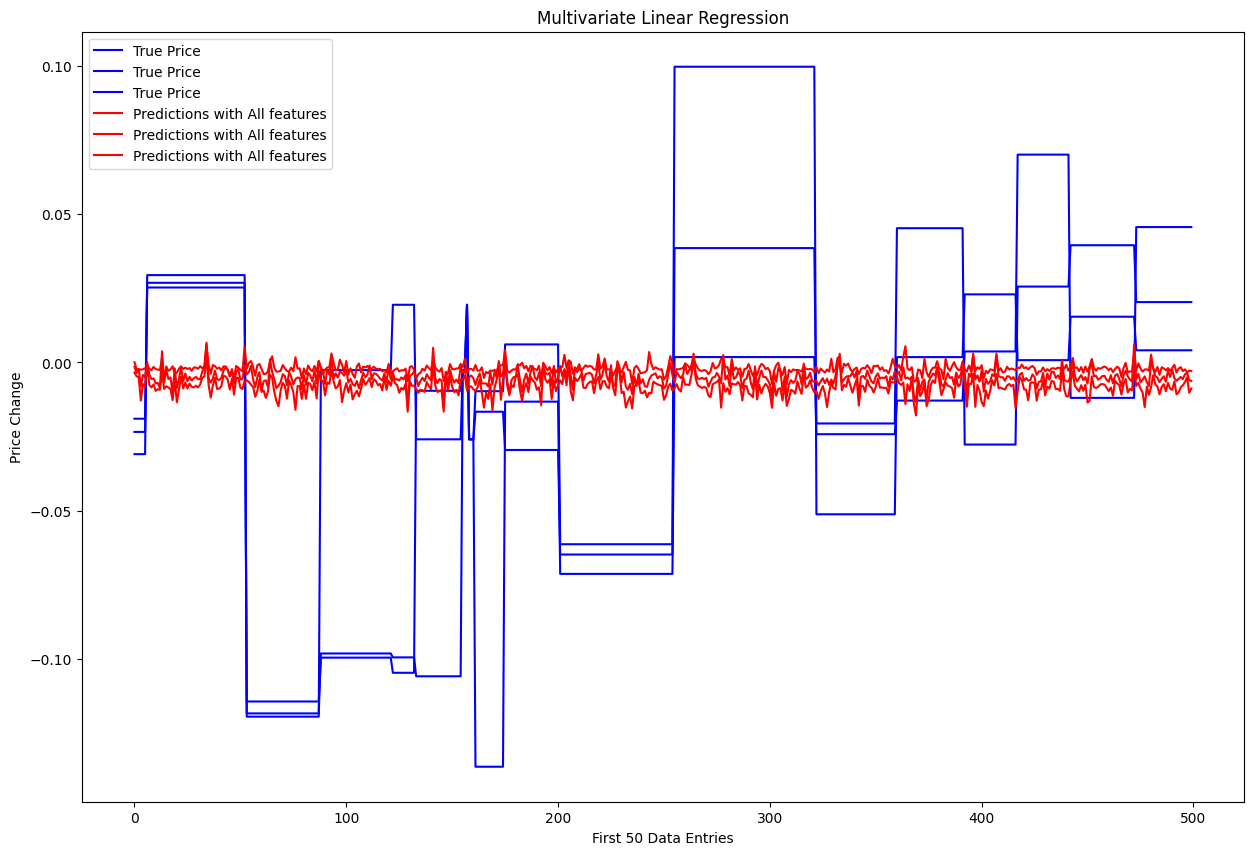

In [219]:
plt.style.use('default')
plt.figure(figsize = (15,10))
plt.plot(test_labels[:500], color = 'blue', label = 'True Price')
plt.plot(quality_lm['Linear Model'][2][1][:500], color = 'red', label = 'Predictions with All features')
plt.xlabel('First 50 Data Entries')
plt.ylabel('Price Change')
plt.title('Multivariate Linear Regression')
plt.legend()
#plt.axhline(y=0, color='g', linestyle='-')
plt.show()

In [221]:
train_labels

array([[ 0.00797652,  0.00797652,  0.00797652],
       [-0.00596249, -0.00596249, -0.00596249],
       [-0.00596249, -0.00596249, -0.00596249],
       ...,
       [-0.01899665, -0.02344811, -0.03095997],
       [-0.01899665, -0.02344811, -0.03095997],
       [-0.01899665, -0.02344811, -0.03095997]])

In [272]:
#Random Forest
estim_list = [500,1000,1500,2000]#[5,10,20,50,100,150,200,[500,1000,1500,2000]
quality_rf = {}

for i in estim_list:
    pmp = time.process_time()
    rf = RandomForestRegressor(n_estimators = i, random_state = 1,n_jobs=-1)
    rf.fit(train_features, train_labels)
    predictions_rf = rf.predict(test_features)
    time_rf = time.process_time()-pmp
    errors_rf = math.sqrt(sklearn.metrics.mean_squared_error(test_labels, predictions_rf))
    quality_rf['Estimators: '+ str(i)] = [['Error: '+ str(errors_rf)],[
        'Time:'+str(time_rf)],['Predictions: ',predictions_rf]]
    
print(quality_rf)

{'Estimators: 500': [['Error: 0.049843175481781916'], ['Time:243.625'], ['Predictions: ', array([[ 0.00161977, -0.00115724, -0.00370784],
       [-0.00576964, -0.00591105, -0.0015361 ],
       [-0.00162017,  0.00034759, -0.00378782],
       ...,
       [-0.00162602, -0.00174907, -0.00420357],
       [ 0.00250602,  0.00429076, -0.00016661],
       [ 0.00426584,  0.004441  ,  0.00505903]])]], 'Estimators: 1000': [['Error: 0.04982366065404747'], ['Time:488.453125'], ['Predictions: ', array([[ 0.00091114, -0.00179603, -0.00402392],
       [-0.00317   , -0.00172205,  0.00168605],
       [-0.00037735,  0.00258728, -0.00189709],
       ...,
       [-0.00272472, -0.00485665, -0.00773818],
       [ 0.00313499,  0.00435153, -0.00036325],
       [ 0.00505338,  0.00319195,  0.00379008]])]], 'Estimators: 1500': [['Error: 0.04982472518720476'], ['Time:732.984375'], ['Predictions: ', array([[ 0.00048663, -0.00164796, -0.0042812 ],
       [-0.00151275,  0.00035284,  0.00346711],
       [-0.00068835,  

In [273]:
print('RF 1000', quality_rf['Estimators: 1000'][0])

RF 1000 ['Error: 0.04982366065404747']


In [258]:
len(test_labels[:4000,0])

4000

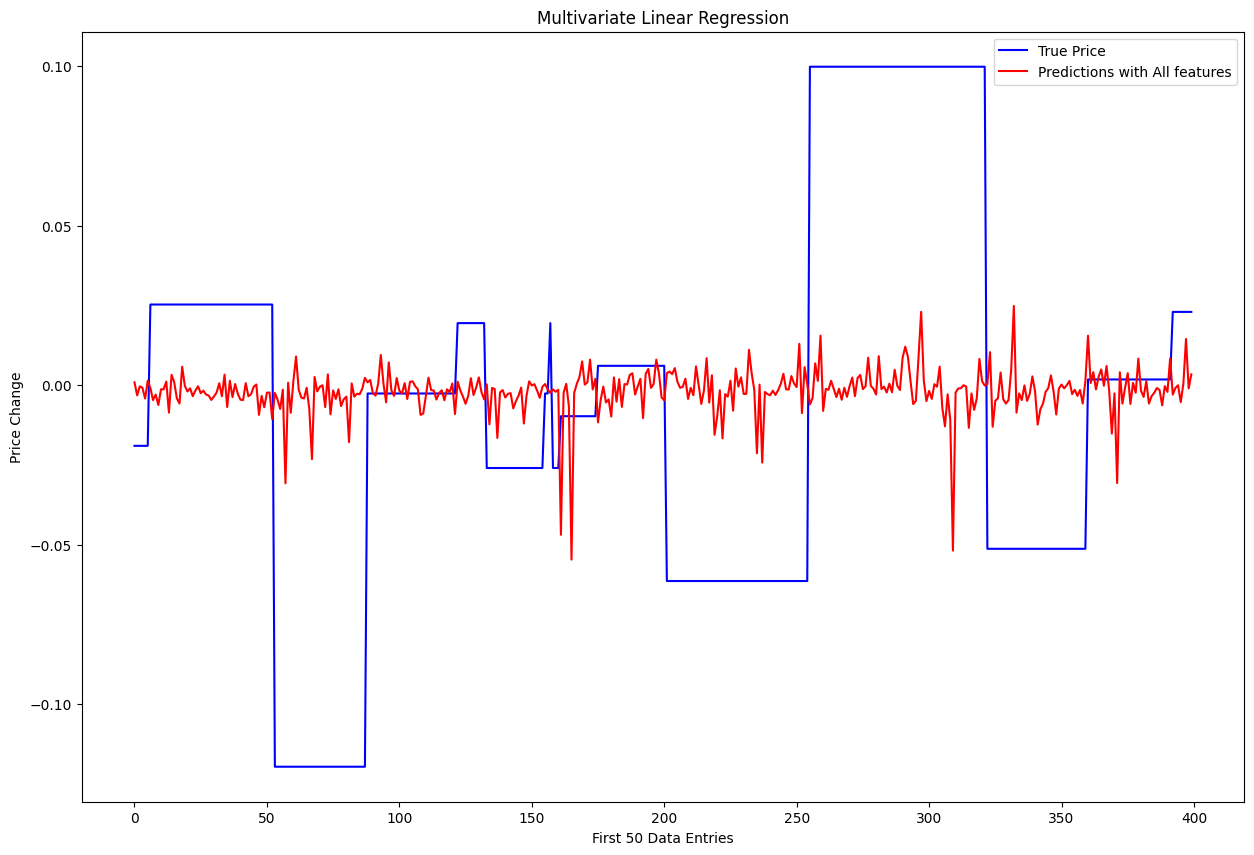

In [274]:
plt.style.use('default')
plt.figure(figsize = (15,10))
plt.plot(test_labels[:400,0], color = 'blue', label = 'True Price')
plt.plot(quality_rf['Estimators: 1000'][2][1][:400,0], color = 'red', label = 'Predictions with All features')
plt.xlabel('First 50 Data Entries')
plt.ylabel('Price Change')
plt.title('Multivariate Linear Regression')
plt.legend()
#plt.axhline(y=0, color='g', linestyle='-')
plt.show()

In [230]:
#XGboosted trees
estim_list = [10,50,100,200,500,1000]
quality_xg = {}


for i in estim_list:
    pmp = time.process_time()
    xg = xgb.XGBRegressor (n_estimators=i)
    xg.fit(train_features, train_labels)
    predictions_xg = xg.predict(test_features)
    time_xg = time.process_time()-pmp
    errors_xg = math.sqrt(sklearn.metrics.mean_squared_error(test_labels, predictions_xg))
    quality_xg['Estimators: '+ str(i)] = [['Error: '+ str(errors_xg)],[
        'Time: '+str(time_xg)],['Predictions: ', predictions_xg]]

print('XGB', quality_xg['Estimators: 100'][0])
#print(quality_xg)

XGB ['Error: 0.05119789076009167']


In [342]:
#CNN and LSTM
X_train = train_features
X_test = test_features
print('xtrain',X_train.shape)
print('xtest',X_test.shape)

#%%

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print('xtrain',X_train.shape)
X_test = X_test.reshape(X_test.shape[0],X_train.shape[1],1)
print('xtest',X_test.shape)

xtrain (16410, 33)
xtest (4103, 33)
xtrain (16410, 33, 1)
xtest (4103, 33, 1)


In [418]:
df_true.to_csv("df_w_categorical_returns.csv")

In [240]:
input_shape

(30, 3)

In [345]:
input_shape = (X_train.shape[1], 1)
model = Sequential()

model.add(Conv1D(64,(3),activation = 'relu', input_shape = input_shape, padding = 'same'))
model.add(MaxPooling1D(pool_size = 2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(units = 50))
model.add(Dropout(0.1))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(5, activation='linear'))

model.compile(optimizer = "adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              #loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error)
model.build((None,)+input_shape)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 33, 64)            256       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 16, 64)           0         
 1D)                                                             
                                                                 
 lstm_14 (LSTM)              (None, 16, 50)            23000     
                                                                 
 dropout_35 (Dropout)        (None, 16, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_36 (Dropout)        (None, 50)                0         
                                                      

In [278]:
train_labels[:,0]

array([ 0.00797652, -0.00596249, -0.00596249, ..., -0.01899665,
       -0.01899665, -0.01899665])

In [283]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [346]:
y_train = train_labels[:,0]
y_test = test_labels[:,0]
epoch_list = [200]
quality_cnn = {}

for i in epoch_list:
    pmp = time.process_time()
    model.fit(X_train, y_train,
              batch_size=150,
              epochs=i,
              verbose=2)
    pred_cnn = model.predict(X_test)
    time_cnn = time.process_time()-pmp
    errors_cnn = math.sqrt(sklearn.metrics.mean_squared_error(test_labels[:,0], pred_cnn))
    quality_cnn['Epochs: '+ str(i)] = [['Error: '+ str(errors_cnn)],[
        'Time: '+str(time_cnn)],['Predictions: ', pred_cnn]]
print(quality_cnn)

Epoch 1/200
110/110 - 6s - loss: 1.5612 - accuracy: 0.3099 - 6s/epoch - 55ms/step
Epoch 2/200
110/110 - 3s - loss: 1.5576 - accuracy: 0.3106 - 3s/epoch - 30ms/step
Epoch 3/200
110/110 - 3s - loss: 1.5545 - accuracy: 0.3106 - 3s/epoch - 30ms/step
Epoch 4/200
110/110 - 3s - loss: 1.5540 - accuracy: 0.3106 - 3s/epoch - 30ms/step
Epoch 5/200
110/110 - 3s - loss: 1.5541 - accuracy: 0.3106 - 3s/epoch - 30ms/step
Epoch 6/200
110/110 - 4s - loss: 1.5530 - accuracy: 0.3106 - 4s/epoch - 32ms/step
Epoch 7/200
110/110 - 4s - loss: 1.5532 - accuracy: 0.3106 - 4s/epoch - 34ms/step
Epoch 8/200
110/110 - 4s - loss: 1.5521 - accuracy: 0.3103 - 4s/epoch - 32ms/step
Epoch 9/200
110/110 - 4s - loss: 1.5525 - accuracy: 0.3102 - 4s/epoch - 32ms/step
Epoch 10/200
110/110 - 3s - loss: 1.5523 - accuracy: 0.3108 - 3s/epoch - 31ms/step
Epoch 11/200
110/110 - 3s - loss: 1.5518 - accuracy: 0.3105 - 3s/epoch - 31ms/step
Epoch 12/200
110/110 - 3s - loss: 1.5517 - accuracy: 0.3104 - 3s/epoch - 31ms/step
Epoch 13/200


Epoch 100/200
110/110 - 3s - loss: 1.4149 - accuracy: 0.3868 - 3s/epoch - 32ms/step
Epoch 101/200
110/110 - 3s - loss: 1.4087 - accuracy: 0.3904 - 3s/epoch - 31ms/step
Epoch 102/200
110/110 - 4s - loss: 1.4074 - accuracy: 0.3895 - 4s/epoch - 32ms/step
Epoch 103/200
110/110 - 4s - loss: 1.4076 - accuracy: 0.3876 - 4s/epoch - 32ms/step
Epoch 104/200
110/110 - 4s - loss: 1.3977 - accuracy: 0.3928 - 4s/epoch - 32ms/step
Epoch 105/200
110/110 - 4s - loss: 1.3927 - accuracy: 0.4005 - 4s/epoch - 33ms/step
Epoch 106/200
110/110 - 3s - loss: 1.3910 - accuracy: 0.3961 - 3s/epoch - 32ms/step
Epoch 107/200
110/110 - 3s - loss: 1.3821 - accuracy: 0.4058 - 3s/epoch - 32ms/step
Epoch 108/200
110/110 - 3s - loss: 1.3822 - accuracy: 0.4019 - 3s/epoch - 31ms/step
Epoch 109/200
110/110 - 3s - loss: 1.3779 - accuracy: 0.4055 - 3s/epoch - 31ms/step
Epoch 110/200
110/110 - 3s - loss: 1.3745 - accuracy: 0.4066 - 3s/epoch - 31ms/step
Epoch 111/200
110/110 - 4s - loss: 1.3708 - accuracy: 0.4076 - 4s/epoch - 32

Epoch 198/200
110/110 - 4s - loss: 1.0367 - accuracy: 0.5799 - 4s/epoch - 32ms/step
Epoch 199/200
110/110 - 3s - loss: 1.0366 - accuracy: 0.5763 - 3s/epoch - 31ms/step
Epoch 200/200
110/110 - 3s - loss: 1.0217 - accuracy: 0.5842 - 3s/epoch - 31ms/step


ValueError: y_true and y_pred have different number of output (1!=5)

In [399]:
pred_cnn[600]

array([-0.5219756 , -0.60622567, -0.05447001, -1.1047024 ,  0.57747525],
      dtype=float32)

In [400]:
test_labels[600]

array([4, 1, 0])

In [409]:
test_labels[:,0]

array([4, 4, 4, ..., 0, 0, 0])

In [406]:
np.argmax(pred_cnn,axis=-1)

array([0, 2, 4, ..., 2, 4, 0], dtype=int64)

In [410]:
cm = sklearn.metrics.confusion_matrix(y_true=test_labels[:,0], y_pred = np.argmax(pred_cnn,axis=-1))

In [336]:
y_train.shape

(16410,)

In [414]:
import itertools

In [415]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [412]:
cm_plot_labels = ["strong_bullish", "weak_bullish","neutral","weak_bearish","strong_bearish"]

Confusion matrix, without normalization
[[228 195 118 193 531]
 [131 100  45 111 293]
 [ 83  59  23  41 149]
 [109  77  36  79 228]
 [226 173  94 191 590]]


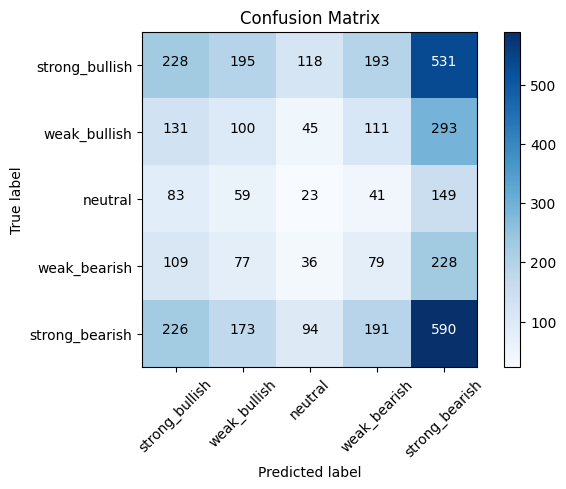

In [416]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [361]:
from tensorflow.keras import datasets, layers, models

In [355]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [359]:
test_labels.shape

(10000, 1)

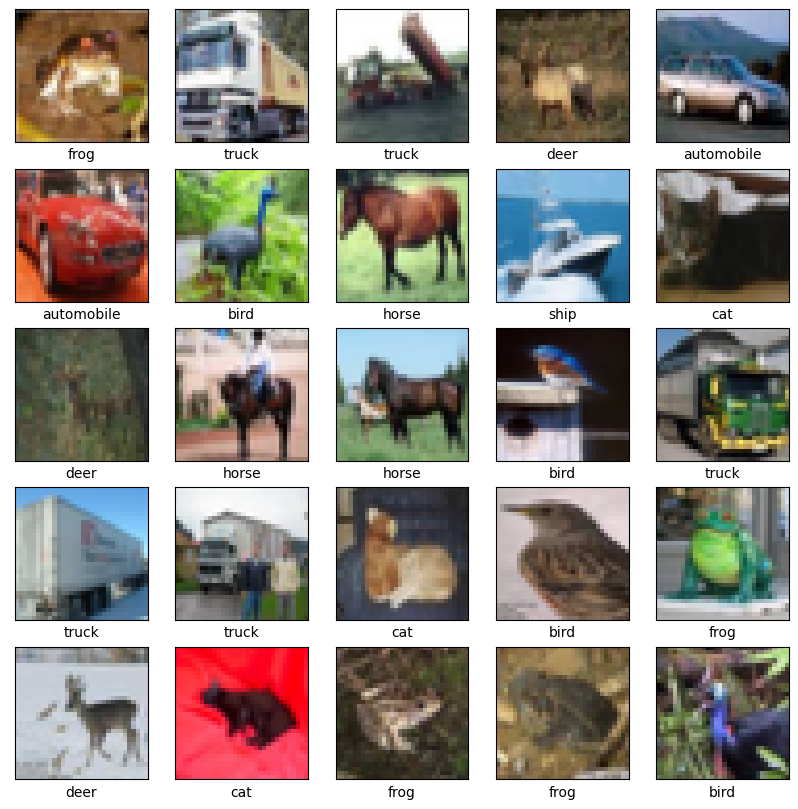

In [356]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [435]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [419]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [363]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5109 - accuracy: 0.4482 - val_loss: 1.3334 - val_accuracy: 0.5227
Epoch 2/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.1539 - accuracy: 0.5922 - val_loss: 1.2117 - val_accuracy: 0.5682
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0125 - accuracy: 0.6449 - val_loss: 0.9968 - val_accuracy: 0.6450
Epoch 4/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9168 - accuracy: 0.6784 - val_loss: 0.9617 - val_accuracy: 0.6614
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8477 - accuracy: 0.7051 - val_loss: 1.0130 - val_accuracy: 0.6447
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7806 - accuracy: 0.7284 - val_loss: 0.8784 - val_accuracy: 0.7011
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7303 - accuracy: 0.7428 - val_loss: 0.8684 -

In [365]:
image_pred = model.predict(test_images)

In [380]:
image_pred[2]

array([ 0.8106201 ,  0.89386606, -2.4103036 , -0.00934059, -6.30528   ,
       -1.9353094 , -3.8983226 , -0.93338484,  3.5081718 , -0.14783534],
      dtype=float32)

In [381]:
test_labels[2]

array([8], dtype=uint8)

In [366]:
image_pred.shape

(10000, 10)